# <center> Статистика
## <center>Лабораторная работа №2
 
#### Выполнила: Александра Ольховатова
#### группа: pyda-8a

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy import stats
import scipy.stats as sts
import statistics
from scipy.stats import kurtosis, skew

**1. Загрузить файл auto.csv**

In [49]:
df=pd.read_csv('auto.csv')
df[:3]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [16]:
symboling = df['symboling']                     #символизация
normalized_losses = df['normalized-losses']     #нормализованные-потери
make = df['make']                               #марка
fuel_type = df['fuel-type']                     #вид топлива
aspiration = df['aspiration']                   #аспирация
num_of_doors = df['num-of-doors']               #кол-во дверей
body_style  = df['body-style']                  #форма кузова
drive_wheels = df['drive-wheels']               #ведущее колесо
engine_location = df['engine-location']         #расположение двигателя
wheel_base = df['wheel-base']                   #расстояние между передней и задней осями автомобиля
length = df['length']                           #длина
width = df['width']                             #ширина
height = df['height']                           #высота
curb_weight = df['curb-weight']                 #общая масса транспортного средства
engine_type = df['engine-type']                 #тип двигателя
num_of_cylinders = df['num-of-cylinders']       #число цилиндров
engine_size = df['engine-size']                 #размер двигателя
fuel_system = df['fuel-system']                 #топливная система
bore = df['bore']                               #диаметр отверстия
stroke = df['stroke']                           #удар
compression_ratio = df['compression-ratio']     #степень сжатия
horsepower = df['horsepower']                   #лошадиная сила
peak_rpm = df['peak-rpm']                       #пик-об / мин
city_mpg = df['city-mpg']                       #сколько миль машина может проехать на 1 галлоне топлива в городе
highway_mpg = df['highway-mpg']                 #сколько миль машина может проехать на 1 галлоне топлива на шоссе
price = df['price']                             #цена

**2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)**

In [17]:
print('Статистические значения для symboling:')
print('Медиана: ', statistics.median(symboling))
print('Мода:', statistics.mode(symboling))
print('Среднее: ', statistics.mean(symboling))
print('Среднее отклонение: ', statistics.pstdev(symboling))
print('Минимум: ', min(symboling)) 
print('Максимум: ', max(symboling))

Статистические значения для symboling:
Медиана:  1
Мода: 0
Среднее:  0.8341463414634146
Среднее отклонение:  1.242265781250978
Минимум:  -2
Максимум:  3


In [18]:
print('Статистические значения для normalized_losses:')
print('Медиана: ', statistics.median(normalized_losses))
print('Мода:', statistics.mode(normalized_losses))
print('Среднее: ', statistics.mean(normalized_losses))
print('Среднее отклонение: ', statistics.pstdev(normalized_losses))
print('Минимум: ', min(normalized_losses)) 
print('Максимум: ', max(normalized_losses))

Статистические значения для normalized_losses:
Медиана:  122
Мода: 161
Среднее:  126.36585365853658
Среднее отклонение:  35.35185930016389
Минимум:  65
Максимум:  256


In [19]:
print('Статистические значения для wheel_base:')
print('Медиана: ', statistics.median(wheel_base))
print('Мода:', statistics.mode(wheel_base))
print('Среднее: ', statistics.mean(wheel_base))
print('Среднее отклонение: ', statistics.pstdev(wheel_base))
print('Минимум: ', min(wheel_base)) 
print('Максимум: ', max(wheel_base))

Статистические значения для wheel_base:
Медиана:  97.0
Мода: 94.5
Среднее:  98.75658536585365
Среднее отклонение:  6.007070472147536
Минимум:  86.6
Максимум:  120.9


In [20]:
print('Статистические значения для : length')
print('Медиана: ', statistics.median(length))
print('Мода:', statistics.mode(length))
print('Среднее: ', statistics.mean(length))
print('Среднее отклонение: ', statistics.pstdev(length))
print('Минимум: ', min(length)) 
print('Максимум: ', max(length))

Статистические значения для : length
Медиана:  173.2
Мода: 157.3
Среднее:  174.04926829268294
Среднее отклонение:  12.307160792874916
Минимум:  141.1
Максимум:  208.1


In [21]:
print('Статистические значения для : width')
print('Медиана: ', statistics.median(width))
print('Мода:', statistics.mode(width))
print('Среднее: ', statistics.mean(width))
print('Среднее отклонение: ', statistics.pstdev(width))
print('Минимум: ', min(width)) 
print('Максимум: ', max(width))

Статистические значения для : width
Медиана:  65.5
Мода: 63.8
Среднее:  65.90780487804878
Среднее отклонение:  2.1399652518208323
Минимум:  60.3
Максимум:  72.3


In [22]:
print('Статистические значения для : height')
print('Медиана: ', statistics.median(height))
print('Мода:', statistics.mode(height))
print('Среднее: ', statistics.mean(height))
print('Среднее отклонение: ', statistics.pstdev(height))
print('Минимум: ', min(height)) 
print('Максимум: ', max(height))

Статистические значения для : height
Медиана:  54.1
Мода: 50.8
Среднее:  53.72487804878049
Среднее отклонение:  2.437554874380412
Минимум:  47.8
Максимум:  59.8


In [23]:
print('Статистические значения для : curb_weight')
print('Медиана: ', statistics.median(curb_weight))
print('Мода:', statistics.mode(curb_weight))
print('Среднее: ', statistics.mean(curb_weight))
print('Среднее отклонение: ', statistics.pstdev(curb_weight))
print('Минимум: ', min(curb_weight)) 
print('Максимум: ', max(curb_weight))

Статистические значения для : curb_weight
Медиана:  2414
Мода: 2385
Среднее:  2555.5658536585365
Среднее отклонение:  519.4086992752507
Минимум:  1488
Максимум:  4066


In [35]:
print('Статистические значения для : engine_size')
print('Медиана: ', statistics.median(engine_size))
#моду посчитать не удалось т.к все значения имеют встречаются нам с двумя вариантами вероятностей
#print('Мода:', statistics.mode(engine_size)) 
print('Среднее: ', statistics.mean(engine_size))
print('Среднее отклонение: ', statistics.pstdev(engine_size))
print('Минимум: ', min(engine_size)) 
print('Максимум: ', max(engine_size))

Статистические значения для : engine_size
Медиана:  120
Среднее:  126.90731707317073
Среднее отклонение:  41.54100172732021
Минимум:  61
Максимум:  326


In [26]:
print('Статистические значения для : bore')
print('Медиана: ', statistics.median(bore))
print('Мода:', statistics.mode(bore))
print('Среднее: ', statistics.mean(bore))
print('Среднее отклонение: ', statistics.pstdev(bore))
print('Минимум: ', min(bore)) 
print('Максимум: ', max(bore))

Статистические значения для : bore
Медиана:  3.31
Мода: 3.62
Среднее:  3.3248780487804876
Среднее отклонение:  0.2723817438746451
Минимум:  2.54
Максимум:  3.94


In [27]:
print('Статистические значения для : stroke')
print('Медиана: ', statistics.median(stroke))
print('Мода:', statistics.mode(stroke))
print('Среднее: ', statistics.mean(stroke))
print('Среднее отклонение: ', statistics.pstdev(stroke))
print('Минимум: ', min(stroke)) 
print('Максимум: ', max(stroke))

Статистические значения для : stroke
Медиана:  3.29
Мода: 3.4
Среднее:  3.2533658536585364
Среднее отклонение:  0.31317086087680646
Минимум:  2.07
Максимум:  4.17


In [28]:
print('Статистические значения для : compression_ratio')
print('Медиана: ', statistics.median(compression_ratio ))
print('Мода:', statistics.mode(compression_ratio ))
print('Среднее: ', statistics.mean(compression_ratio ))
print('Среднее отклонение: ', statistics.pstdev(compression_ratio ))
print('Минимум: ', min(compression_ratio )) 
print('Максимум: ', max(compression_ratio ))

Статистические значения для : compression_ratio
Медиана:  9.0
Мода: 9.0
Среднее:  10.142536585365853
Среднее отклонение:  3.962340575219067
Минимум:  7.0
Максимум:  23.0


In [29]:
print('Статистические значения для : horsepower')
print('Медиана: ', statistics.median(horsepower))
print('Мода:', statistics.mode(horsepower))
print('Среднее: ', statistics.mean(horsepower))
print('Среднее отклонение: ', statistics.pstdev(horsepower))
print('Минимум: ', min(horsepower)) 
print('Максимум: ', max(horsepower))

Статистические значения для : horsepower
Медиана:  95
Мода: 68
Среднее:  106.04878048780488
Среднее отклонение:  43.36265180640503
Минимум:  48
Максимум:  288


In [30]:
print('Статистические значения для : peak_rpm')
print('Медиана: ', statistics.median(peak_rpm))
print('Мода:', statistics.mode(peak_rpm))
print('Среднее: ', statistics.mean(peak_rpm))
print('Среднее отклонение: ', statistics.pstdev(peak_rpm))
print('Минимум: ', min(peak_rpm)) 
print('Максимум: ', max(peak_rpm))

Статистические значения для : peak_rpm
Медиана:  5200
Мода: 5500
Среднее:  5131.463414634146
Среднее отклонение:  479.7588874892529
Минимум:  4150
Максимум:  6600


In [31]:
print('Статистические значения для : city_mpg')
print('Медиана: ', statistics.median(city_mpg))
print('Мода:', statistics.mode(city_mpg))
print('Среднее: ', statistics.mean(city_mpg))
print('Среднее отклонение: ', statistics.pstdev(city_mpg))
print('Минимум: ', min(city_mpg)) 
print('Максимум: ', max(city_mpg))

Статистические значения для : city_mpg
Медиана:  24
Мода: 31
Среднее:  25.21951219512195
Среднее отклонение:  6.526165703262264
Минимум:  13
Максимум:  49


In [32]:
print('Статистические значения для : highway_mpg')
print('Медиана: ', statistics.median(highway_mpg))
print('Мода:', statistics.mode(highway_mpg))
print('Среднее: ', statistics.mean(highway_mpg))
print('Среднее отклонение: ', statistics.pstdev(highway_mpg))
print('Минимум: ', min(highway_mpg)) 
print('Максимум: ', max(highway_mpg))

Статистические значения для : highway_mpg
Медиана:  30
Мода: 25
Среднее:  30.75121951219512
Среднее отклонение:  6.869626394897537
Минимум:  16
Максимум:  54


In [33]:
print('Статистические значения для : price')
print('Медиана: ', statistics.median(price))
print('Мода:', statistics.mode(price))
print('Среднее: ', statistics.mean(price))
print('Среднее отклонение: ', statistics.pstdev(price))
print('Минимум: ', min(price)) 
print('Максимум: ', max(price))

Статистические значения для : price
Медиана:  10295
Мода: 6785
Среднее:  13312.71219512195
Среднее отклонение:  8082.686173881863
Минимум:  5118
Максимум:  45400


**3. Рассчитать и визуализировать корреляционную матрицу для переменных**

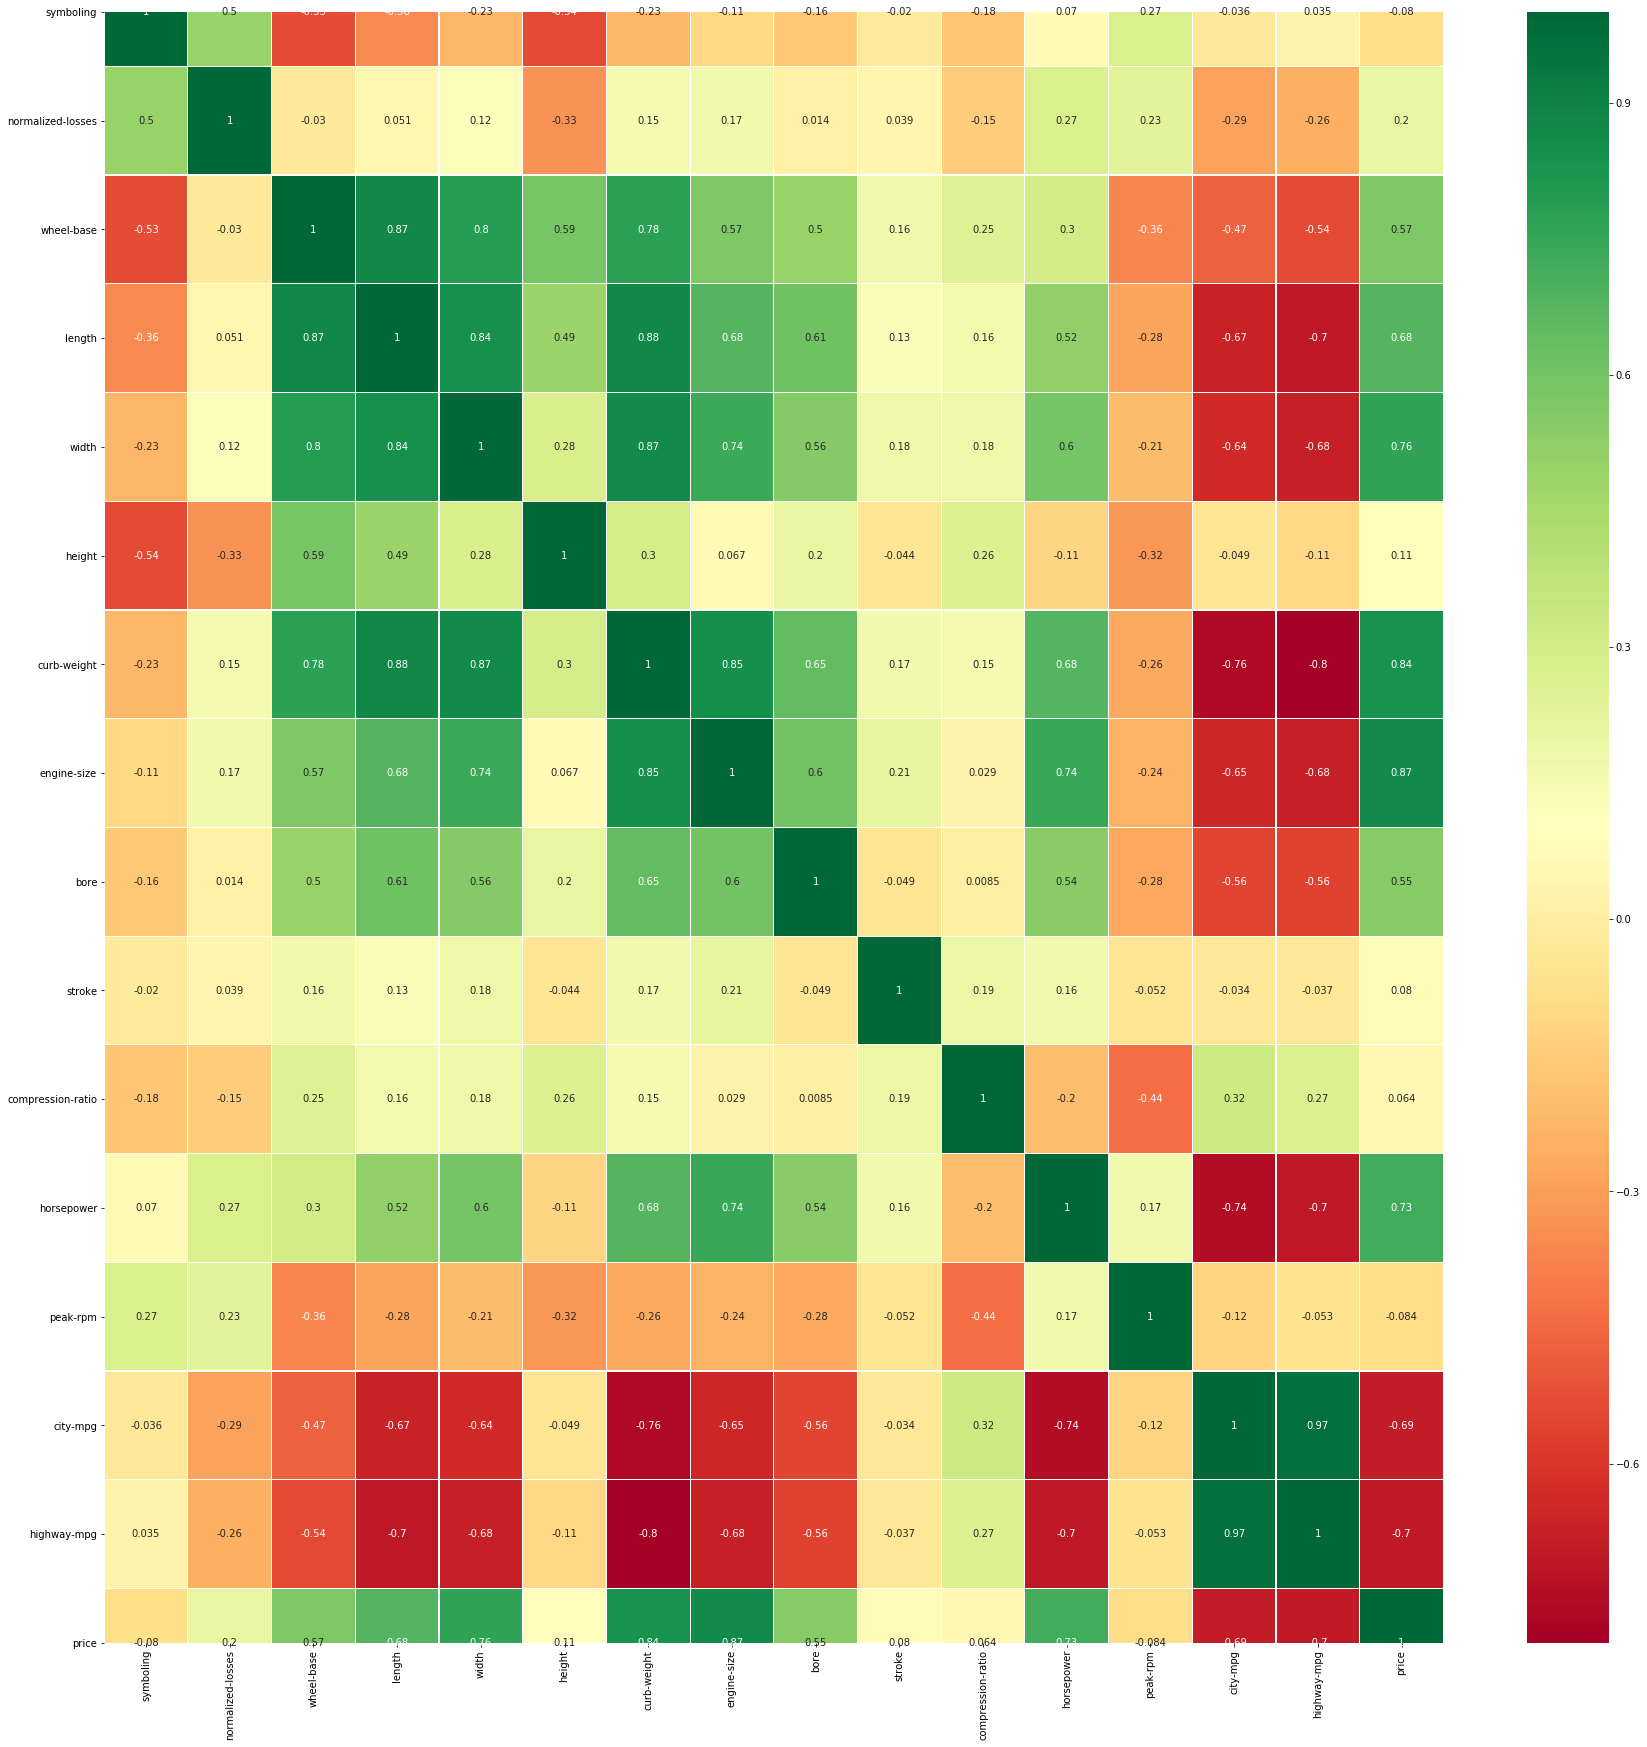

In [6]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

**4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis**

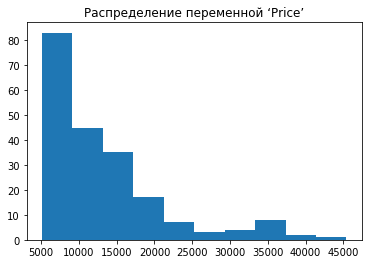

In [10]:
plt.hist(price)
plt.title('Распределение переменной ‘Price’')
plt.show()

In [47]:
print('Показатель skewness:', skew(price)) 
print('Показатель kurtosis:', kurtosis(price))  

Показатель skewness: 1.7534486514523662
Показатель kurtosis: 2.848082544390688


**5. Визуализировать несколько взаимосвязей между переменными**

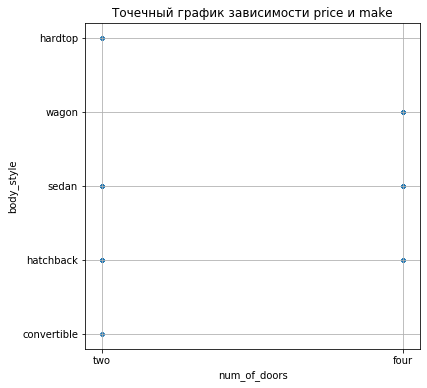

In [90]:
plt.xlabel('num_of_doors')
plt.ylabel('body_style')
plt.title('Точечный график зависимости price и make')
plt.grid(True)
plt.scatter(num_of_doors, body_style, marker='.')
plt.rcParams['figure.figsize'] = [6, 6]

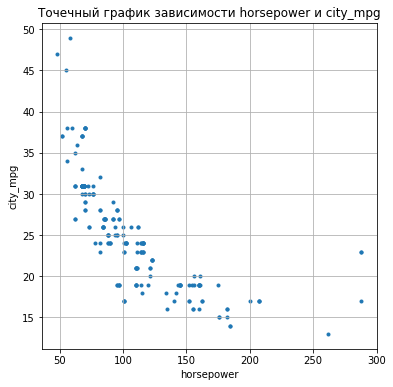

In [88]:
plt.xlabel('horsepower')
plt.ylabel('city_mpg')
plt.title('Точечный график зависимости horsepower и city_mpg')
plt.grid(True)
plt.scatter(horsepower, city_mpg, marker='.')
plt.rcParams['figure.figsize'] = [6, 6]

**6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.**

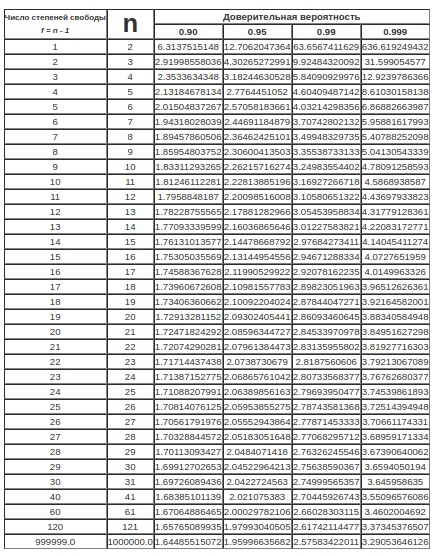

In [93]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

**Гипотеза 1 От цены зависит сколько мил проедет машина по шассе на 1 заправке**

In [122]:
price1 = df[df['price']>=13515]['highway-mpg']
price2 = df[df['price']<13515]['highway-mpg']
print(sts.ttest_ind(price1,price2))

Ttest_indResult(statistic=-11.21038081640071, pvalue=5.157131978307196e-23)


**Ответ:** Гипотеза не подтверждена

**Гипотеза 2 От цены зависит сколько количество лошадиных сил**

In [120]:
price1 = df[df['price']>=13515]['horsepower']
price2 = df[df['price']<13515]['horsepower']
print(sts.ttest_ind(price1,price2))

Ttest_indResult(statistic=10.072162314512642, pvalue=1.3072235295052555e-19)


**Ответ:** Гипотеза не подтверждена

**Гипотеза 3 От цены зависит количесвто оборотов в минуту**

In [127]:
price1 = df[df['price']>=13515]['peak-rpm']
price2 = df[df['price']<13515]['peak-rpm']
print(sts.ttest_ind(price1,price2))

Ttest_indResult(statistic=-0.8338133714618126, pvalue=0.4053662094404631)


In [128]:
print('Количество цен:',len(price))

Количество цен: 205


p-value = 0.405, если считать стандартную альфа ошибки 0.01, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между общим биллирубином больных и здоровных людей.
t-value = 0.833 (для значения степеней свободы 205 значения нет, но оно не превышает 2,57)

**Ответ:** Можно считать, что гипотеза 3 верна